In [1]:
import pandas as pd
df=pd.read_excel("Data/Bluemonk Input Data for Blog Generation.xlsx")

In [2]:
df = df.iloc[:, 2:]
df.head()



,Topic,Keywords,LSI KEYWORDS,Content Angle,Density,Products
0,Understanding Color Psychology in Luxury Gifts...,"luxury gifts with meaning, Murano glass bracel...","emotional gifting, artisan bead colors, person...",Dive into how colors evoke emotions and make m...,1-2% (Educate while showcasing Blue Monk’s uni...,The color combination is rare and the set divi...
1,What bracelets are in style 2025,"2025 bracelet trends, Murano glass statement p...","Czech bead designs, gold-accented accessories,...","Predict top trends, such as bold colors, susta...",1.5-2% (Focus on trends that align with Blue M...,"A must-have!!', 'Into You Bracelet': 'Turquois..."
2,"You Have $100, Which Bracelet Do You Buy?","affordable luxury bracelets, best Murano glass...","handcrafted elegance, artisan bead bracelets, ...",Position Blue Monk’s collection as affordable ...,1-1.5% (Highlight products and their value for...,We simply can't imagine life without bracelets...
3,Glass Beads vs Moissanite: Which is the Better...,"Murano glass bead bracelets, Venetian glass je...","Czech glass designs, gold foil beads, luxury c...",Highlight the artistry and heritage behind Blu...,1-1.5% (Focus on storytelling and showcasing B...,Shiny white gemstone beads with a patterned gl...
4,Gemstone beads vs Moissanite: Which is the Bet...,"Murano glass bead bracelets, Venetian glass je...","gemstone beads, gold foil beads, luxury crafts...",Highlight the artistry and heritage behind Blu...,1-1.5% (Focus on storytelling and showcasing B...,We simply can't imagine life without bracelets...


In [4]:
data= []
for index, row in df.iterrows():
    # Create a dictionary to store column names and values for the current row
    row_data = {}
    for col_name, value in row.items():
        row_data[col_name] = value  # Add column name and value to the dictionary
    data.append(row_data)  # Append the dictionary to the result list

data

[{'Topic ': 'Understanding Color Psychology in Luxury Gifts – Thoughtful Gifting with a Personal Touch',
  'Keywords': 'luxury gifts with meaning, Murano glass bracelet symbolism, gemstone color psychology, personal gift ideas.',
  'LSI KEYWORDS': 'emotional gifting, artisan bead colors, personalized accessories, unique luxury bracelets.',
  'Content Angle': 'Dive into how colors evoke emotions and make meaningful gifts. Use examples of Blue Monk bracelets with specific colors or materials, like calming blues of Murano glass or earthy tones of shells.',
  'Density': '1-2% (Educate while showcasing Blue Monk’s unique features).',
  'Products': 'The color combination is rare and the set divine! A must-have for every woman!\', \'Turquoise Gaze\': \'Immerse in the calm of the ocean with this turquoise-hued bracelet, a beautiful accessory that brings a sense of tranquility to your\\xa0 whole being. The light blue bead bracelet is a perfect companion, imparting glamor and elegance to the ove

In [38]:
data

[{'Topic ': 'Understanding Color Psychology in Luxury Gifts – Thoughtful Gifting with a Personal Touch',
  'Keywords': 'luxury gifts with meaning, Murano glass bracelet symbolism, gemstone color psychology, personal gift ideas.',
  'LSI KEYWORDS': 'emotional gifting, artisan bead colors, personalized accessories, unique luxury bracelets.',
  'Content Angle': 'Dive into how colors evoke emotions and make meaningful gifts. Use examples of Blue Monk bracelets with specific colors or materials, like calming blues of Murano glass or earthy tones of shells.',
  'Density': '1-2% (Educate while showcasing Blue Monk’s unique features).',
  'Products': 'The color combination is rare and the set divine! A must-have for every woman!\', \'Turquoise Gaze\': \'Immerse in the calm of the ocean with this turquoise-hued bracelet, a beautiful accessory that brings a sense of tranquility to your\\xa0 whole being. The light blue bead bracelet is a perfect companion, imparting glamor and elegance to the ove

In [ ]:
from core.ai.chain import return_ai_blog_content
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


for i in data:
    topic=i['Topic ']
    keywords=i['Keywords']
    lsi_keywords=i['LSI KEYWORDS']
    content_angle=i['Content Angle']
    density=i['Density']
    products=i['Products']
    ai_content= await return_ai_blog_content(topic,keywords,lsi_keywords,content_angle,density,products)
    ai_content=ai_content.content
    file_name=topic+'.txt'
    with open(file_name,'w') as f:
        f.write(ai_content)
    splitt = re.split(r'#+', ai_content)
    texts = [part for part in splitt if part]



    

In [75]:
from core.ai.chain import return_ai_blog_content
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from rouge_score import rouge_scorer

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

# Initialize a list to store all ROUGE-L scores matrices
all_rouge_scores = []

# Iterate over the data
for i in data:
    topic = i['Topic ']
    keywords = i['Keywords']
    lsi_keywords = i['LSI KEYWORDS']
    content_angle = i['Content Angle']
    density = i['Density']
    products = i['Products']

    # Get AI-generated content
    ai_content = await return_ai_blog_content(topic, keywords, lsi_keywords, content_angle, density, products)
    ai_content = ai_content.content

    # Save the AI content to a file
    file_name = topic + '.txt'
    with open(file_name, 'w') as f:
        f.write(ai_content)

    # Split the content and remove empty strings
    splitt = re.split(r'#+', ai_content)
    texts = [part for part in splitt if part]

    # Initialize a matrix to store ROUGE-L scores for this topic
    rouge_scores = [[0 for _ in range(len(texts))] for _ in range(len(texts))]

    # Calculate ROUGE-L scores for every pair of elements
    for i, ref in enumerate(texts):
        for j, cand in enumerate(texts):
            scores = scorer.score(ref, cand)
            rouge_scores[i][j] = scores['rougeL'].fmeasure  # Store the F1 score

    # Append the ROUGE-L scores matrix to the list
    all_rouge_scores.append(np.array(rouge_scores))

    # Create a heatmap for this topic
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        np.array(rouge_scores),
        annot=True,
        fmt=".2f",
        cmap="YlOrRd",
        xticklabels=range(len(texts)),
        yticklabels=range(len(texts)),
    )
    plt.xlabel("Candidate Text Index")
    plt.ylabel("Reference Text Index")
    plt.title(f"ROUGE-L Scores Heatmap for Topic: {topic}")

    # Save the heatmap for this topic
    heatmap_file_name = f"{topic}_heatmap.png"
    plt.savefig(heatmap_file_name)
    plt.close()  # Close the figure to free memory

# Optionally, merge all ROUGE-L scores matrices into a single heatmap
if all_rouge_scores:
    # Find the maximum dimensions across all ROUGE-L score matrices
    max_rows = max(scores.shape[0] for scores in all_rouge_scores)
    max_cols = max(scores.shape[1] for scores in all_rouge_scores)

    # Pad all matrices to the same shape (max_rows, max_cols)
    padded_rouge_scores = []
    for scores in all_rouge_scores:
        padded_matrix = np.zeros((max_rows, max_cols))
        padded_matrix[:scores.shape[0], :scores.shape[1]] = scores
        padded_rouge_scores.append(padded_matrix)

    # Convert the list of padded matrices to a NumPy array
    padded_rouge_scores = np.array(padded_rouge_scores)

    # Calculate the average ROUGE-L scores
    average_rouge_scores = np.mean(padded_rouge_scores, axis=0)

    # Create a heatmap for the averaged scores
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        average_rouge_scores,
        annot=True,
        fmt=".2f",
        cmap="YlOrRd",
        xticklabels=range(max_cols),
        yticklabels=range(max_rows),
    )
    plt.xlabel("Candidate Text Index")
    plt.ylabel("Reference Text Index")
    plt.title("Average ROUGE-L Scores Heatmap Across All Topics")

    # Save the merged heatmap
    plt.savefig("average_rouge_heatmap.png")
    plt.close()

In [77]:
from core.ai.chain import return_ai_blog_content
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from rouge_score import rouge_scorer

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

# Initialize a list to store all ROUGE-L scores matrices
all_rouge_scores = []
all_topics = []  # Store topic names for labeling

# Iterate over the data
for i in data:
    topic = i['Topic ']
    keywords = i['Keywords']
    lsi_keywords = i['LSI KEYWORDS']
    content_angle = i['Content Angle']
    density = i['Density']
    products = i['Products']

    # Get AI-generated content
    ai_content = await return_ai_blog_content(topic, keywords, lsi_keywords, content_angle, density, products)
    ai_content = ai_content.content

    # Save the AI content to a file
    file_name = topic + '.md'
    with open(file_name, 'w') as f:
        f.write(ai_content)

    # Split the content and remove empty strings
    splitt = re.split(r'#+', ai_content)
    texts = [part for part in splitt if part]

    # Initialize a matrix to store ROUGE-L scores for this topic
    rouge_scores = [[0 for _ in range(len(texts))] for _ in range(len(texts))]

    # Calculate ROUGE-L scores for every pair of elements
    for i, ref in enumerate(texts):
        for j, cand in enumerate(texts):
            scores = scorer.score(ref, cand)
            rouge_scores[i][j] = scores['rougeL'].fmeasure  # Store the F1 score

    # Append the ROUGE-L scores matrix and topic name to the lists
    all_rouge_scores.append(np.array(rouge_scores))
    all_topics.append(topic)

# Combine all heatmaps into a single image
num_topics = len(all_topics)
num_cols = 2  # Number of columns in the grid
num_rows = (num_topics + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle("ROUGE-L Scores Heatmaps for All Topics", fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each heatmap in its respective subplot
for idx, (rouge_scores, topic) in enumerate(zip(all_rouge_scores, all_topics)):
    ax = axes[idx]
    sns.heatmap(
        rouge_scores,
        annot=True,
        fmt=".2f",
        cmap="YlOrRd",
        xticklabels=range(rouge_scores.shape[1]),
        yticklabels=range(rouge_scores.shape[0]),
        ax=ax,
    )
    ax.set_xlabel("Candidate Text Index")
    ax.set_ylabel("Reference Text Index")
    ax.set_title(f"Topic: {topic}")

# Hide any unused subplots
for idx in range(num_topics, num_rows * num_cols):
    axes[idx].axis('off')

# Adjust layout and save the combined image
plt.tight_layout()
plt.savefig("combined_heatmaps.png")
plt.close()

In [67]:
g.content

"### Understanding Color Psychology in Luxury Gifts – Thoughtful Gifting with a Personal Touch\n\nIn the realm of luxury gifts, color psychology plays a pivotal role in crafting meaningful presents that resonate on a personal level. Each hue in a luxury item is more than just a visual delight; it carries an emotional weight that can transform a simple gift into a cherished memory. This blog explores how colors evoke emotions, using examples from the exquisite Blue Monk bracelet collection, to guide you in selecting luxury gifts with meaning.\n\n#### The Art of Emotional Gifting\n\nEmotional gifting is an art that goes beyond the material value of an item. It involves choosing gifts that speak to the heart, often through the subtle language of colors. For instance, the calming blues of Murano glass in the **Turquoise Gaze Bracelet** are known to evoke feelings of peace and tranquility, making it an ideal gift for someone who needs a touch of serenity in their life. This aligns with the 

In [70]:
import re

# Split on #, ##, or ### using regex
# Split on #, ##, or ### using regex
splitt = re.split(r'#+', g.content)

# Remove empty strings from the list
splitt = [part for part in splitt if part]

print(splitt)

[' Understanding Color Psychology in Luxury Gifts – Thoughtful Gifting with a Personal Touch\n\nIn the realm of luxury gifts, color psychology plays a pivotal role in crafting meaningful presents that resonate on a personal level. Each hue in a luxury item is more than just a visual delight; it carries an emotional weight that can transform a simple gift into a cherished memory. This blog explores how colors evoke emotions, using examples from the exquisite Blue Monk bracelet collection, to guide you in selecting luxury gifts with meaning.\n\n', ' The Art of Emotional Gifting\n\nEmotional gifting is an art that goes beyond the material value of an item. It involves choosing gifts that speak to the heart, often through the subtle language of colors. For instance, the calming blues of Murano glass in the **Turquoise Gaze Bracelet** are known to evoke feelings of peace and tranquility, making it an ideal gift for someone who needs a touch of serenity in their life. This aligns with the br

In [71]:
print(splitt)

[' Understanding Color Psychology in Luxury Gifts – Thoughtful Gifting with a Personal Touch\n\nIn the realm of luxury gifts, color psychology plays a pivotal role in crafting meaningful presents that resonate on a personal level. Each hue in a luxury item is more than just a visual delight; it carries an emotional weight that can transform a simple gift into a cherished memory. This blog explores how colors evoke emotions, using examples from the exquisite Blue Monk bracelet collection, to guide you in selecting luxury gifts with meaning.\n\n', ' The Art of Emotional Gifting\n\nEmotional gifting is an art that goes beyond the material value of an item. It involves choosing gifts that speak to the heart, often through the subtle language of colors. For instance, the calming blues of Murano glass in the **Turquoise Gaze Bracelet** are known to evoke feelings of peace and tranquility, making it an ideal gift for someone who needs a touch of serenity in their life. This aligns with the br

In [55]:
from rouge_score import rouge_scorer

# Initialize the scorer
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
# Initialize a matrix to store ROUGE-L scores
rouge_scores = [[0 for _ in range(len(texts))] for _ in range(len(texts))]

# Calculate ROUGE-L scores for every pair of elements
for i, ref in enumerate(texts):
    for j, cand in enumerate(texts):
        scores = scorer.score(ref, cand)
        rouge_scores[i][j] = scores['rougeL'].fmeasure  # Store the F1 score

# Print the ROUGE-L scores matrix
print("ROUGE-L Scores Matrix:")
for row in rouge_scores:
    print(row)


ROUGE-L Scores Matrix:
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 1.0, 0.1581920903954802, 0.1625, 0.1375, 0.1476510067114094, 0.20359281437125748, 0.19251336898395718]
[0, 0.1581920903954802, 1.0, 0.17177914110429449, 0.15950920245398773, 0.11842105263157895, 0.16470588235294117, 0.2]
[0, 0.1625, 0.17177914110429449, 1.0, 0.17808219178082194, 0.16296296296296298, 0.14379084967320263, 0.17341040462427748]
[0, 0.1375, 0.15950920245398773, 0.17808219178082194, 1.0, 0.2074074074074074, 0.1699346405228758, 0.19653179190751446]
[0, 0.1476510067114094, 0.11842105263157895, 0.16296296296296298, 0.2074074074074074, 1.0, 0.18309859154929578, 0.20987654320987656]
[0, 0.20359281437125748, 0.16470588235294117, 0.14379084967320263, 0.1699346405228758, 0.18309859154929578, 1.0, 0.1888888888888889]
[0, 0.19251336898395718, 0.2, 0.17341040462427748, 0.19653179190751446, 0.20987654320987656, 0.1888888888888889, 1.0]


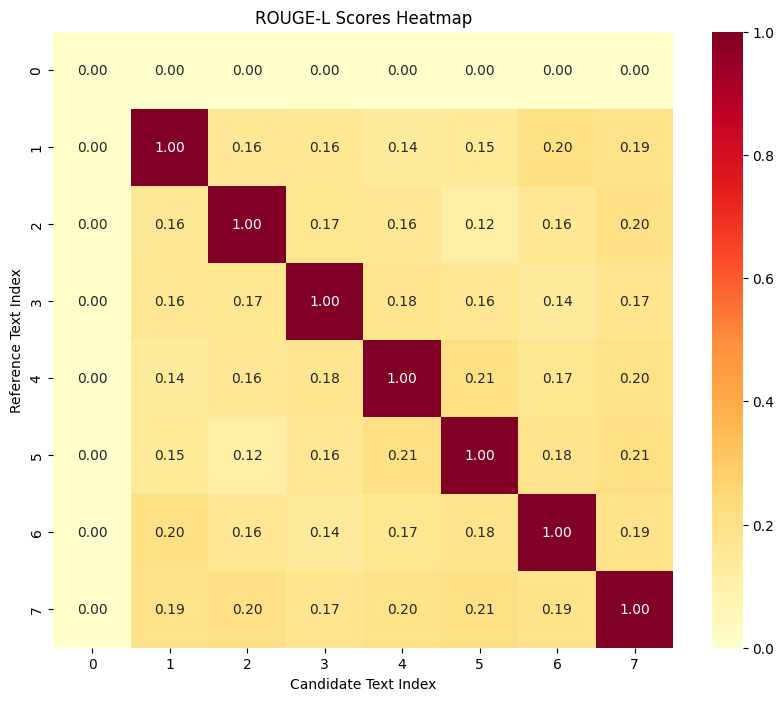

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `rouge_scores` is the matrix of ROUGE-L scores from the previous code
rouge_scores = np.array(rouge_scores)  # Convert the list to a NumPy array for easier handling

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(
    rouge_scores,
    annot=True,  # Annotate the heatmap with the actual values
    fmt=".2f",  # Format the annotations to 2 decimal places
    cmap="YlOrRd",  # Choose a color map (e.g., "YlOrRd" for yellow-orange-red)
    xticklabels=range(len(texts)),  # Label x-axis with indices
    yticklabels=range(len(texts)),  # Label y-axis with indices
)

# Add labels and title
plt.xlabel("Candidate Text Index")
plt.ylabel("Reference Text Index")
plt.title("ROUGE-L Scores Heatmap")

# Show the heatmap
plt.show()